# Analítica de texto  
Autora: Beatriz Ibarra Mendoza  
Última actualización: 07/02/2024  

Este notebook realiza el análisis de una base de datos de X relacionada con movimiento en inversiones y la bolsa. El procesamiento de los datos se realizó con Natural Language Toolkit. El notebook incluye las siguientes etapas:  
* *Instalación* de las paqueterías.  
* Definición de funciones para el *pre-procesamiento*.  
* *Exploración* del conjunto de datos.  
* *Creación del corpus* y pre-procesamiento.  
* Gráficas de exploración.  
* *Análisis de sentimientos*.  
* *Conclusiones finales*.

### Instalación

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
import spacy
from spacy import displacy

In [ ]:
import regex as re

In [ ]:
from itertools import chain

In [ ]:
from wordcloud import WordCloud

### Definición de funciones para preprocesamiento

In [ ]:
patron = "\w+\p{L}+"

In [ ]:
def token(texto):
    return re.findall(patron, texto.lower())

In [ ]:
def remove_stopwords(vtexto, langg='english'):
    diccionario = stopwords.words(langg)
    return [ palabra for palabra in vtexto if palabra not in diccionario ]

In [ ]:
def stemming(tokens):
  stemmer = PorterStemmer()
  stemming_tokens = [stemmer.stem(token) for token in tokens]
  return stemming_tokens

In [ ]:
def preprocesa(texto):
    fn = [str.lower, token, remove_stopwords, stemming] # estas son las funciones que se definieron arriba
    for funcion in fn:
        texto = funcion(texto)
    return texto

In [ ]:
def word_cloud(corpus, stopwords, color):
    stopwords = set(stopwords)
    wordcloud = WordCloud(
        background_color=color,
        stopwords=stopwords,
        max_words=100,
        max_font_size=45,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

### Exploración de datos

In [ ]:
stocker_df = pd.read_csv('/content/stockerbot-export.csv')
stocker_df.head()

,id,text,timestamp,source,symbols,company_names,url,verified,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
stocker_df.shape

(28440, 17)

In [ ]:
stocker_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28440 entries, 0 to 28439
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             28440 non-null  object
 1   text           28440 non-null  object
 2   timestamp      28438 non-null  object
 3   source         28437 non-null  object
 4   symbols        28437 non-null  object
 5   company_names  28435 non-null  object
 6   url            22049 non-null  object
 7   verified       28436 non-null  object
 8   Unnamed: 8     11 non-null     object
 9   Unnamed: 9     11 non-null     object
 10  Unnamed: 10    11 non-null     object
 11  Unnamed: 11    11 non-null     object
 12  Unnamed: 12    8 non-null      object
 13  Unnamed: 13    8 non-null      object
 14  Unnamed: 14    8 non-null      object
 15  Unnamed: 15    7 non-null      object
 16  Unnamed: 16    7 non-null      object
dtypes: object(17)
memory usage: 3.7+ MB


In [ ]:
# Remover columnas 'unnamed' del df.
remove_columns = ['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
                             'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
                             'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16']
stocker_df = stocker_df.drop(columns = remove_columns)

In [ ]:
stocker_df.head()

,id,text,timestamp,source,symbols,company_names,url,verified
0,1.0197E+18,VIDEO: “I was in my office. I was minding my o...,Wed Jul 18 21:33:26 +0000 2018,GoldmanSachs,GS,The Goldman Sachs,https://twitter.com/i/web/status/1019696670777...,True
1,1.01971E+18,The price of lumber $LB_F is down 22% since hi...,Wed Jul 18 22:22:47 +0000 2018,StockTwits,M,Macy's,https://twitter.com/i/web/status/1019709091038...,True
2,1.01971E+18,Who says the American Dream is dead? https://t...,Wed Jul 18 22:32:01 +0000 2018,TheStreet,AIG,American,https://buff.ly/2L3kmc4,True
3,1.01972E+18,Barry Silbert is extremely optimistic on bitco...,Wed Jul 18 22:52:52 +0000 2018,MarketWatch,BTC,Bitcoin,https://twitter.com/i/web/status/1019716662587...,True
4,1.01972E+18,How satellites avoid attacks and space junk wh...,Wed Jul 18 23:00:01 +0000 2018,Forbes,ORCL,Oracle,http://on.forbes.com/6013DqDDU,True


### Creación del corpus - preprocesamiento

In [ ]:
# Crear nuevo df con categorías de interés.
stocker_cleaned = stocker_df[['text', 'source', 'symbols']]

In [ ]:
stocker_cleaned.shape

(28440, 3)

In [ ]:
# Crear vectores de tokens y agregar en nueva columna.
stocker_cleaned['tokens'] = stocker_cleaned.text.apply(preprocesa)
stocker_cleaned

<ipython-input-71-6bdd0914ec6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocker_cleaned['tokens'] = stocker_cleaned.text.apply(preprocesa)


,text,source,symbols,tokens
0,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,GS,"[video, offic, mind, busi, david, solomon, tel..."
1,The price of lumber $LB_F is down 22% since hi...,StockTwits,M,"[price, lumber, lb_f, sinc, hit, ytd, high, ma..."
2,Who says the American Dream is dead? https://t...,TheStreet,AIG,"[say, american, dream, dead, http, co, crgx19x..."
3,Barry Silbert is extremely optimistic on bitco...,MarketWatch,BTC,"[barri, silbert, extrem, optimist, bitcoin, pr..."
4,How satellites avoid attacks and space junk wh...,Forbes,ORCL,"[satellit, avoid, attack, space, junk, circl, ..."
...,...,...,...,...
28435,$FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,test5f1798,FB,"[fb, 29234a9c, 7f, 4d5a, 985f, cb1a5554ecf]"
28436,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,keizai_toushi17,BTC,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt..."
28437,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,iad81,BTC,"[rt, invest_in_hd, nuff, said, tel, telcoin, t..."
28438,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,O8viWMyrCV6cBOZ,BTC,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt..."


In [ ]:
# Borrar palabras de tokens que no aportan al conjunto de información, e.g. 'http'.
specwords = set(['us', 'http', 'co', 'ep', 'see'])
stocker_cleaned['tokens_2'] = stocker_cleaned['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in map(str.lower, specwords)])


<ipython-input-72-d05165d2d453>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocker_cleaned['tokens_2'] = stocker_cleaned['tokens'].apply(lambda tokens: [token for token in tokens if token.lower() not in map(str.lower, specwords)])


In [ ]:
# Cálculo de longitud de tokens por registro.
stocker_cleaned["length_tokens"] = stocker_cleaned.tokens_2.apply(len)
stocker_cleaned

<ipython-input-73-fcd57b5a49f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocker_cleaned["length_tokens"] = stocker_cleaned.tokens_2.apply(len)


,text,source,symbols,tokens,tokens_2,length_tokens
0,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,GS,"[video, offic, mind, busi, david, solomon, tel...","[video, offic, mind, busi, david, solomon, tel...",12
1,The price of lumber $LB_F is down 22% since hi...,StockTwits,M,"[price, lumber, lb_f, sinc, hit, ytd, high, ma...","[price, lumber, lb_f, sinc, hit, ytd, high, ma...",12
2,Who says the American Dream is dead? https://t...,TheStreet,AIG,"[say, american, dream, dead, http, co, crgx19x...","[say, american, dream, dead, crgx19x7sa]",5
3,Barry Silbert is extremely optimistic on bitco...,MarketWatch,BTC,"[barri, silbert, extrem, optimist, bitcoin, pr...","[barri, silbert, extrem, optimist, bitcoin, pr...",12
4,How satellites avoid attacks and space junk wh...,Forbes,ORCL,"[satellit, avoid, attack, space, junk, circl, ...","[satellit, avoid, attack, space, junk, circl, ...",11
...,...,...,...,...,...,...
28435,$FB : 29234a9c-7f08-4d5a-985f-cb1a5554ecf9,test5f1798,FB,"[fb, 29234a9c, 7f, 4d5a, 985f, cb1a5554ecf]","[fb, 29234a9c, 7f, 4d5a, 985f, cb1a5554ecf]",6
28436,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,keizai_toushi17,BTC,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt...","[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, tr6...",7
28437,RT @invest_in_hd: 'Nuff said! $TEL #telcoin #...,iad81,BTC,"[rt, invest_in_hd, nuff, said, tel, telcoin, t...","[rt, invest_in_hd, nuff, said, tel, telcoin, t...",14
28438,【仮想通貨】ビットコインの価格上昇、８０万円台回復 約１カ月半ぶり $BTC ht...,O8viWMyrCV6cBOZ,BTC,"[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, htt...","[仮想通貨, ビットコインの価格上昇, ８０万円台回復, 約１カ月半ぶり, btc, 1oa...",7


In [ ]:
# Determinar la frecuencia de palabras más comunes.
tokens_list = list(chain.from_iterable(stocker_cleaned['tokens_2']))
common_words = FreqDist(tokens_list)

freq_common_words = pd.DataFrame(list(common_words.items()), columns=["Word", "Frequency"])
freq_common_words = freq_common_words.sort_values(by="Frequency", ascending=False)

freq_common_words.head(10)

,Word,Frequency
232,rt,4660
473,inc,4143
96,amp,3020
56,stock,2905
108,earn,2130
355,analyst,1933
12,price,1854
366,trade,1831
130,share,1654
119,expect,1476


### Gráficas de exploración

In [ ]:
# Wordcloud
corpus_stocker = [palabra for ptoken in stocker_cleaned.tokens_2 for palabra in ptoken]
corpus_stocker

['video',
 'offic',
 'mind',
 'busi',
 'david',
 'solomon',
 'tell',
 'gs',
 'intern',
 'learn',
 'wa',
 'qclaitywxv',
 'price',
 'lumber',
 'lb_f',
 'sinc',
 'hit',
 'ytd',
 'high',
 'maci',
 'turnaround',
 'still',
 'happen',
 'xnksv4de',
 'say',
 'american',
 'dream',
 'dead',
 'crgx19x7sa',
 'barri',
 'silbert',
 'extrem',
 'optimist',
 'bitcoin',
 'predict',
 'new',
 'crypto',
 'entrant',
 'go',
 'zero',
 'mgmvo2czgi',
 'satellit',
 'avoid',
 'attack',
 'space',
 'junk',
 'circl',
 'earth',
 'ahziv3lqp',
 'paid',
 'oracl',
 'kacpqzwidj',
 'realmoney',
 'david',
 'butler',
 'favorit',
 'fang',
 'stock',
 'realmoneysod',
 'alphabet',
 'facebook',
 'mczapsfjoi',
 'miss',
 'convo',
 'one',
 'favorit',
 'thinker',
 'samharrisorg',
 'uupvxiobch',
 'intellig',
 'document',
 'nelson',
 'mandela',
 'made',
 'public',
 'xtnefo1ro',
 'v8dxkwdq6r',
 'senat',
 'want',
 'emerg',
 'alert',
 'go',
 'netflix',
 'spotifi',
 'etc',
 '23yy3whblc',
 'grg',
 'hedg',
 'fund',
 'manag',
 'marc',
 'larsi'

In [ ]:
texto_stocker = " ".join(palabra for palabra in corpus_stocker)
texto_stocker

'video offic mind busi david solomon tell gs intern learn wa qclaitywxv price lumber lb_f sinc hit ytd high maci turnaround still happen xnksv4de say american dream dead crgx19x7sa barri silbert extrem optimist bitcoin predict new crypto entrant go zero mgmvo2czgi satellit avoid attack space junk circl earth ahziv3lqp paid oracl kacpqzwidj realmoney david butler favorit fang stock realmoneysod alphabet facebook mczapsfjoi miss convo one favorit thinker samharrisorg uupvxiobch intellig document nelson mandela made public xtnefo1ro v8dxkwdq6r senat want emerg alert go netflix spotifi etc 23yy3whblc grg hedg fund manag marc larsi say bitcoin 40k possibl 54upe0owqt propos expedit appeal fight amp time warner purchas btjhzde3nu gh32zj4vpo roger feder uniqlo deal make one athlet earn 70m endors jq8soayebq bond trader ahead jerom powel come inflat expect dkdzlcy3mt via ucx7eihp4r alcoa cut adjust ebitda forecast cite tariff share slide mdmjxjnyi 5o8fvwlhpi custom urg boycott mgm resort casino

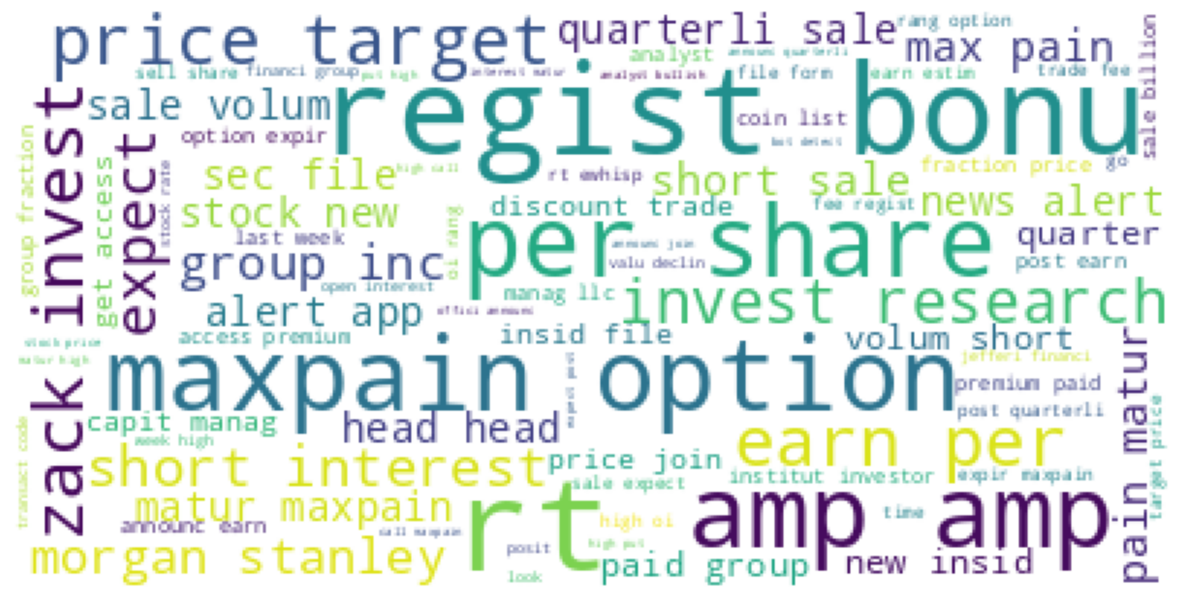

In [ ]:
word_cloud(texto_stocker, [], "white")

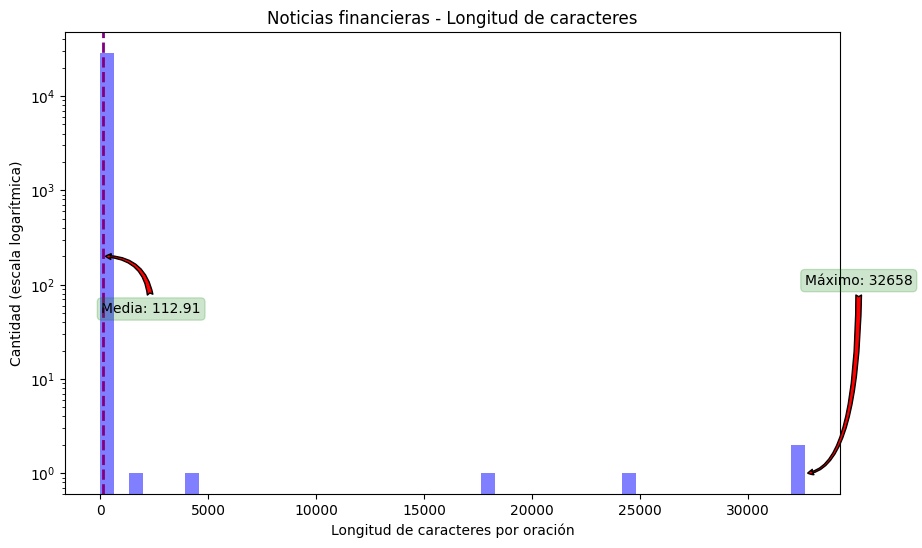

In [ ]:
# Histograma
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(stocker_cleaned['text'].str.len(), bins=50, alpha=0.5, color='blue', log=True)


plt.axvline(x=stocker_cleaned['text'].str.len().mean(), ymin=0, ymax=1, color='purple', linestyle='--', linewidth=2)
text_mean = 'Media: %.2f' % stocker_cleaned['text'].str.len().mean()
plt.annotate(text_mean, xy=(stocker_cleaned['text'].str.len().mean(), 200), xytext=(50, 50),
             arrowprops=dict(facecolor='red', arrowstyle='fancy', connectionstyle='angle3'),
             bbox=dict(boxstyle='round', color='green', alpha=0.2, linewidth=0.9))

text_max = 'Máximo: %d' % stocker_cleaned['text'].str.len().max()
plt.annotate(text_max, xy=(stocker_cleaned['text'].str.len().max(), 1), xytext=(stocker_cleaned['text'].str.len().max(), 100),
             arrowprops=dict(facecolor='red', arrowstyle='fancy', connectionstyle='angle3'),
             bbox=dict(boxstyle='round', color='green', alpha=0.2, linewidth=0.9))

plt.title('Noticias financieras - Longitud de caracteres')
plt.xlabel('Longitud de caracteres por oración')
plt.ylabel('Cantidad (escala logarítmica)')
plt.show()


### Análisis de sentimientos

In [ ]:
sia = SentimentIntensityAnalyzer()

stocker_cleaned['sentiment_scores'] = stocker_cleaned['text'].apply(lambda x: sia.polarity_scores(x))
stocker_cleaned['compound_score'] = stocker_cleaned['sentiment_scores'].apply(lambda x: x['compound'])

def asignar_sentimiento(score):
    if score >= 0.05:
        return 'Positivo'
    elif score <= -0.05:
        return 'Negativo'
    else:
        return 'Neutro'

stocker_cleaned['feeling'] = stocker_cleaned['compound_score'].apply(asignar_sentimiento)

# Limpieza de columnas
cols_drop = ['tokens', 'sentimiento', 'sentiment_scores', 'compound_score']
stocker_cleaned = stocker_cleaned.drop(columns=cols_drop)

stocker_cleaned.head(5)


,text,source,symbols,tokens_2,length_tokens,feeling
0,VIDEO: “I was in my office. I was minding my o...,GoldmanSachs,GS,"[video, offic, mind, busi, david, solomon, tel...",12,Neutro
1,The price of lumber $LB_F is down 22% since hi...,StockTwits,M,"[price, lumber, lb_f, sinc, hit, ytd, high, ma...",12,Neutro
2,Who says the American Dream is dead? https://t...,TheStreet,AIG,"[say, american, dream, dead, crgx19x7sa]",5,Negativo
3,Barry Silbert is extremely optimistic on bitco...,MarketWatch,BTC,"[barri, silbert, extrem, optimist, bitcoin, pr...",12,Positivo
4,How satellites avoid attacks and space junk wh...,Forbes,ORCL,"[satellit, avoid, attack, space, junk, circl, ...",11,Negativo


In [ ]:
# Contar cuántos registros son positivos, negativos o neutros.
feeling_count = stocker_cleaned['feeling'].value_counts()
print(feeling_count)

Neutro      15537
Positivo    10092
Negativo     2811
Name: feeling, dtype: int64


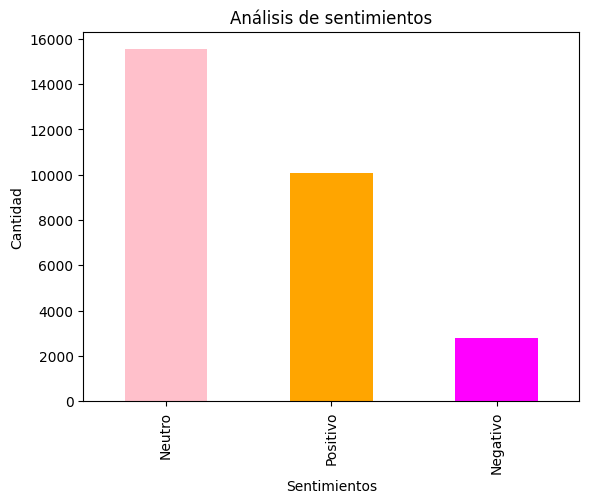

In [ ]:
# Graficar cantidad de registros.
feeling_count.plot(kind='bar', color=['pink', 'orange', 'magenta'])


plt.title('Análisis de sentimientos')
plt.xlabel('Sentimientos')
plt.ylabel('Cantidad')
plt.show()


### Conclusiones finales

* El conjunto de datos analizados en este trabajo corresponde a la recopilación de twits por un bot que sigue las tendencias financieras en empresas que cotizan en la bolsa.  
* Después de la creación del corpus y del preprocesamiento, se realizó un análisis de sentimientos en el conjunto de datos. Se obtuvo que el 54.6% de los twits contiene mensajes de connotación neutra; el 35.4% tienen connotación positiva y el 10% connotación negativa.  
* La mayor parte de los registros tiene una media de longitud de 112 caracteres por oración, sin embargo, la longitud máxima registrada es de 32658 caracteres por oración.  
* De acuerdo con la visualización de word cloud, se pueden concluir algunos puntos:  
  - Los inversores podrían estar interesados en entender la relación entre el precio de cierre y las ganancias-pérdidas ('max pain').  
  - Los inversores podrían tener interés en información relacionada con beneficios adicionales que podrían afectar sus decisiones de inversión ('bonus').  
  - Los inversores podrían interesarse en los rendimientos por acción ('per share').  
  - Los inversores podrían interesarse en evaluar las opciones financieras y estrategias relacionadas a ellas ('option').  
  - Los inversores podrían relacionarse con eventos internos en una empresa ('new insid').  
  - Los inversores podrían interesarse en el monitoreo de acciones vendidas en corto en el mercado ('short interest').  
  - Los inversores también podrían interesarse en el seguimiento del volumen de ventas/negociación  ('sale volum').  
* En general, el análisis de este conjunto de datos permite identificar y evaluar cuáles son los parámetros de interés de diferentes firmas financieras.